In [279]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import sys

from libwallerlab.utilities import noise, simulation, roi
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

yp.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Object

99.7485385128681


<IPython.core.display.Javascript object>


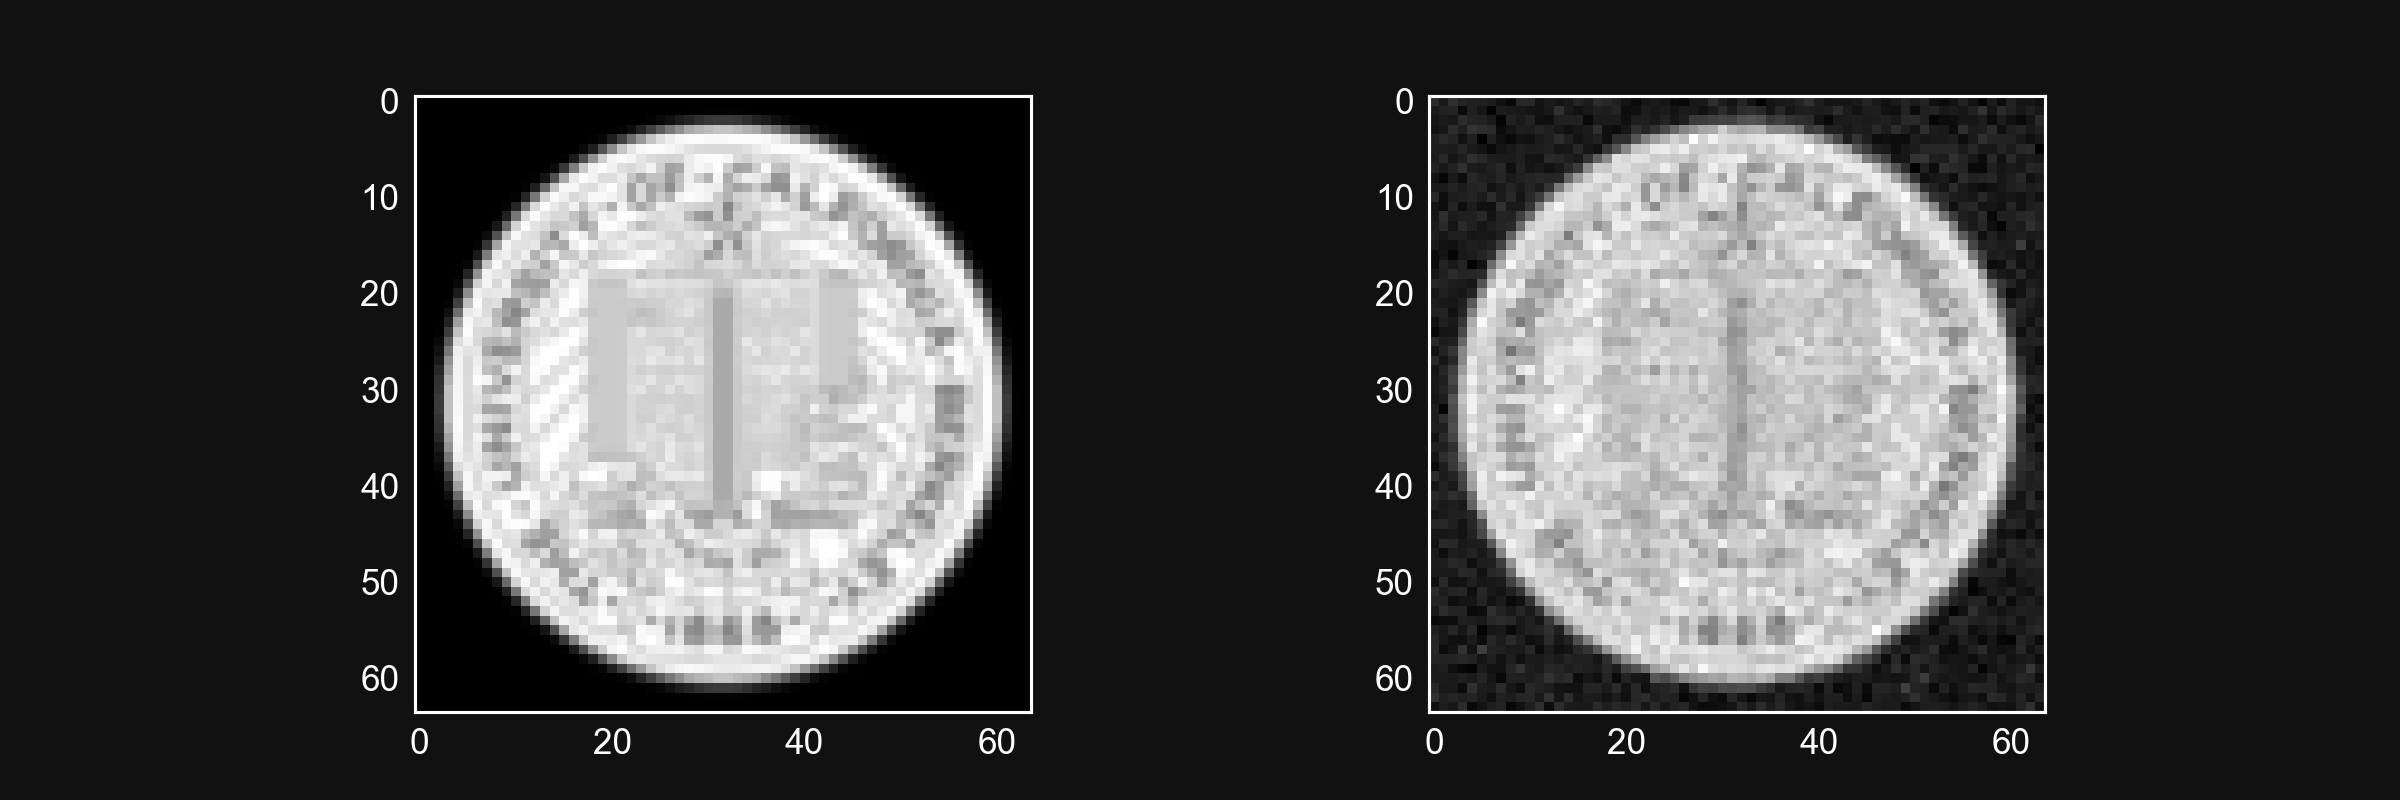

In [280]:
object_shape = (64,64)

# Generate signal
signal = simulation.testObject('ucbseal', dtype='float32', shape=object_shape)

# Define signal-less ROI for noise calculations
noise_roi = roi.Roi(shape=(4,4))

# Define SNR
snr = 100

# Add noise with SNR
noisy_signal= noise.add(signal, 'gaussian', snr=snr)

# Calculate SNR
print(noise.snr(noisy_signal, noise_roi=noise_roi))

plt.figure()
plt.subplot(121)
plt.imshow(signal)
plt.subplot(122)
plt.imshow(noisy_signal)

## Generate 1D Blurring Function

In [281]:
h_full = yp.pad(np.asarray([[1, 0, 0, 1, 1, 0, 1]]), object_shape, center=True)
h = h_full[object_shape[0] // 2 - 1, :]
x = signal[3, :]

# Generate forward operator
A = sp.linalg.circulant(yp.fft.fftshift(h))

# Generate noiseless measurement
y_noiseless = A.dot(x)

# Add noise
snr = 100
y = noise.add(y_noiseless, 'gaussian', snr=snr)

# Invert
A_inv = np.linalg.inv(A)

# Recover
x_rec_noiseless = A_inv.dot(y_noiseless)
x_rec = A_inv.dot(y)

# Calculate SNR of measurements and reconstructions
sh = 20
snr_measurement = noise.snr(y, noise_roi=yp.Roi(shape=[sh]))
snr_recon = noise.snr(x_rec, noise_roi=yp.Roi(shape=[sh]))

print(snr_measurement)
print(snr_recon)

f = calcDnfFromKernel(h)
print(f * snr_recon)
print(f)

115.33457032880365
33.883160374038326
114.59874054879383
3.3821738965235584


In [282]:
u, s, v = np.linalg.svd(A)
sigma = s ** 2


f_squared = yp.abs(yp.sum(yp.max(sigma) / sigma) / len(sigma))
print(np.sqrt(f_squared))

3.3821738965235606
